In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
zoma_df = pd.read_csv('zomato.csv')
country_df = pd.read_excel('Country-Code.xlsx')

# Country Code Dataset

In [3]:
country_df.shape

(15, 2)

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [5]:
country_df.describe()

,Country Code
count,15.000000
mean,137.933333
std,80.009345
min,1.000000
25%,65.500000
50%,166.000000
75%,199.500000
max,216.000000


In [6]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# Zomato Dataset

In [7]:
zoma_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
zoma_df.shape

(9551, 21)

In [9]:
zoma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
# five point summary of numerical columns (int and float)
zoma_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
# To get the stats for categorical cols 
zoma_df.select_dtypes(include=['object']).describe()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [12]:
# We can also use just "O" as shown below to fetch describe for categorical cols
zoma_df.describe(include='O')

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
count,9551,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,8918,1208,1265,1825,12,2,2,2,1,6,6
top,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,Orange,Average
freq,83,5473,11,122,122,936,8652,8393,7100,9517,9551,3737,3737


In [13]:
for i in zoma_df.columns:
    print("Column: {}".format(i), 'value counts are: ', zoma_df[i].value_counts(), '\n\n-------------------------------------------')

Column: Restaurant ID value counts are:  18432000    1
8961        1
18398614    1
305166      1
773         1
           ..
304510      1
18312575    1
300416      1
302465      1
2047        1
Name: Restaurant ID, Length: 9551, dtype: int64 

-------------------------------------------
Column: Restaurant Name value counts are:  Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Tippy Tippy Tap              1
The Fashion Street Caf��     1
RV Restaurant                1
Wood Stone                   1
Singh Tawa Corner            1
Name: Restaurant Name, Length: 7446, dtype: int64 

-------------------------------------------
Column: Country Code value counts are:  1      8652
216     434
215      80
189      60
30       60
214      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Count

# EDA

In [14]:
zoma_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [15]:
zoma_df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

We can also frame a simple code for checking the same using python comprehension lists

In [16]:
def get_is_null_vals(dataframe):
    """
        This function checks and outputs all the columns with missing null values 
    """
    try: return [col for col in dataframe.columns if dataframe[col].isnull().sum()>0]
    except Exception as error: return error

In [17]:
get_is_null_vals(zoma_df)

['Cuisines']

as you can see we have one column 'Cuisines' which has missing values

In [18]:
zoma_df['Cuisines'].isnull().sum()  # there are 9 missing values

9

we can validate the same using a heatmap also, but as we have only 9 values in only 1 of the column missing, we will not be able to decipher from this heatmap for this particular plot.

<AxesSubplot:>

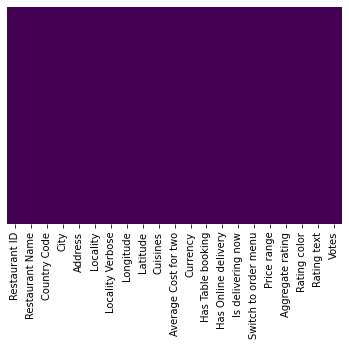

In [19]:
sns.heatmap(zoma_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Joining both the datasets based on 'Country Code'

In [20]:
final_df = pd.merge(zoma_df, country_df, on='Country Code', how='left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [21]:
print(zoma_df.shape)
print(zoma_df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [22]:
print(final_df.shape)
print(final_df.columns)

(9551, 22)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')


***As we can see an additional column got added called 'Country' from the Country-Code.xlsx(country_df)***

# Exploring numerical variables from the final merged dataset

In [23]:
final_df.Country.value_counts()
# As we can see max search results are from India, now lets find out the values

India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Singapore           20
Qatar               20
Canada               4
Name: Country, dtype: int64

In [24]:
final_df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Sri Lanka', 'Singapore', 'Qatar', 'Canada'],
      dtype='object')

In [25]:
country_name_list = list(final_df.Country.value_counts().index)
country_name_list

['India',
 'United States',
 'United Kingdom',
 'Brazil',
 'South Africa',
 'UAE',
 'New Zealand',
 'Turkey',
 'Australia',
 'Phillipines',
 'Indonesia',
 'Sri Lanka',
 'Singapore',
 'Qatar',
 'Canada']

([<matplotlib.patches.Wedge object at 0x000002B6D8EA79D0>, <matplotlib.patches.Wedge object at 0x000002B6D8EA7EB0>, <matplotlib.patches.Wedge object at 0x000002B6D8EB4370>, <matplotlib.patches.Wedge object at 0x000002B6D8EB47F0>, <matplotlib.patches.Wedge object at 0x000002B6D8EB4C70>, <matplotlib.patches.Wedge object at 0x000002B6D8EC2130>, <matplotlib.patches.Wedge object at 0x000002B6D8EC25B0>, <matplotlib.patches.Wedge object at 0x000002B6D8EC2A30>, <matplotlib.patches.Wedge object at 0x000002B6D8EC2EB0>, <matplotlib.patches.Wedge object at 0x000002B6D8ECE370>, <matplotlib.patches.Wedge object at 0x000002B6D8E8E460>, <matplotlib.patches.Wedge object at 0x000002B6D8ECEC40>, <matplotlib.patches.Wedge object at 0x000002B6D8EDD100>, <matplotlib.patches.Wedge object at 0x000002B6D8EDD580>, <matplotlib.patches.Wedge object at 0x000002B6D8EDDA00>], [Text(-1.052256163793291, 0.3205572737577906, 'India'), Text(0.9911329812843455, -0.477132490415823, 'United States'), Text(1.0572858296119743

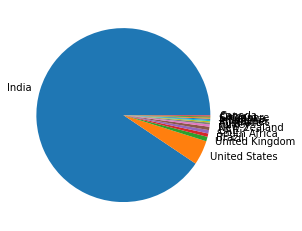

In [26]:
# lets plot the same
print(plt.pie(x=final_df.Country.value_counts().values, labels=country_name_list))

([<matplotlib.patches.Wedge object at 0x000002B6D8F22EB0>, <matplotlib.patches.Wedge object at 0x000002B6D8F2E5E0>, <matplotlib.patches.Wedge object at 0x000002B6D8F2EC70>, <matplotlib.patches.Wedge object at 0x000002B6D8F3C340>], [Text(-1.079055178053478, 0.21363502221306527, 'India'), Text(1.0676486633072917, -0.26481376802982426, 'United States'), Text(1.0974500606462831, -0.07485562361953522, 'United Kingdom'), Text(1.0997704220141564, -0.022472624742216625, 'Brazil')], [Text(-0.5885755516655334, 0.11652819393439923, '93.78%'), Text(0.5823538163494317, -0.1444438734708132, '4.70%'), Text(0.5986091239888817, -0.04083034015611012, '0.87%'), Text(0.5998747756440852, -0.012257795313936339, '0.65%')])


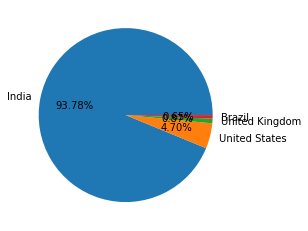

In [27]:
print(plt.pie(x=final_df.Country.value_counts().values[:4], labels=country_name_list[:4], autopct="%1.2f%%"))
#India, US, UK followed by Brazip stand in the top 4 places 

In [28]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [29]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [30]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [31]:
aggregate_df = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
aggregate_df.head(2)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1


In [32]:
aggregate_df['Rating text'].value_counts()

Average      10
Poor          7
Excellent     5
Good          5
Very Good     5
Not rated     1
Name: Rating text, dtype: int64

In [33]:
aggregate_df['Rating text'].value_counts().index

Index(['Average', 'Poor', 'Excellent', 'Good', 'Very Good', 'Not rated'], dtype='object')

In [34]:
# aggregate_df.where(aggregate_df['Rating text']=='Poor')
aggregate_df[aggregate_df['Rating text']=='Average']

,Aggregate rating,Rating color,Rating text,Rating Count
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191
10,2.7,Orange,Average,250
11,2.8,Orange,Average,315
12,2.9,Orange,Average,381
13,3.0,Orange,Average,468
14,3.1,Orange,Average,519
15,3.2,Orange,Average,522
16,3.3,Orange,Average,483
17,3.4,Orange,Average,498


In [35]:
# Observations
for i in list(aggregate_df['Rating text'].value_counts().index):
    temp_df = aggregate_df[aggregate_df['Rating text']==i]
    print("Aggregate rating range for", i, "is:", "{} - {}".format(min(temp_df['Aggregate rating']), max(temp_df['Aggregate rating'])))

Aggregate rating range for Average is: 2.5 - 3.4
Aggregate rating range for Poor is: 1.8 - 2.4
Aggregate rating range for Excellent is: 4.5 - 4.9
Aggregate rating range for Good is: 3.5 - 3.9
Aggregate rating range for Very Good is: 4.0 - 4.4
Aggregate rating range for Not rated is: 0.0 - 0.0


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

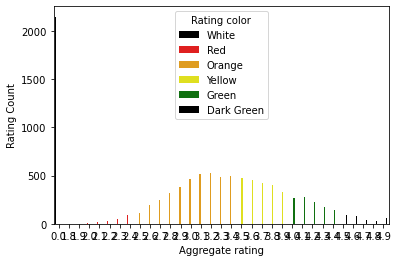

In [36]:
sns.barplot(x='Aggregate rating', y='Rating Count', hue='Rating color', data=aggregate_df, palette=['black','red','orange','yellow','green'])

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

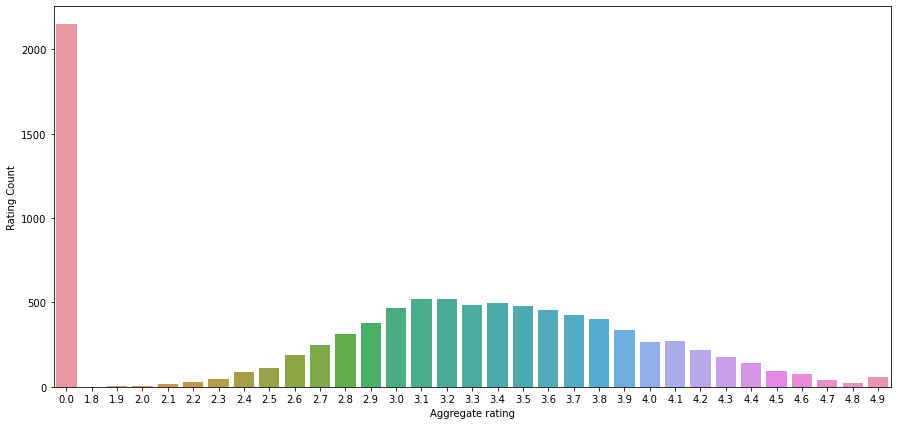

In [37]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 7)
sns.barplot(x='Aggregate rating', y='Rating Count', data=aggregate_df)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

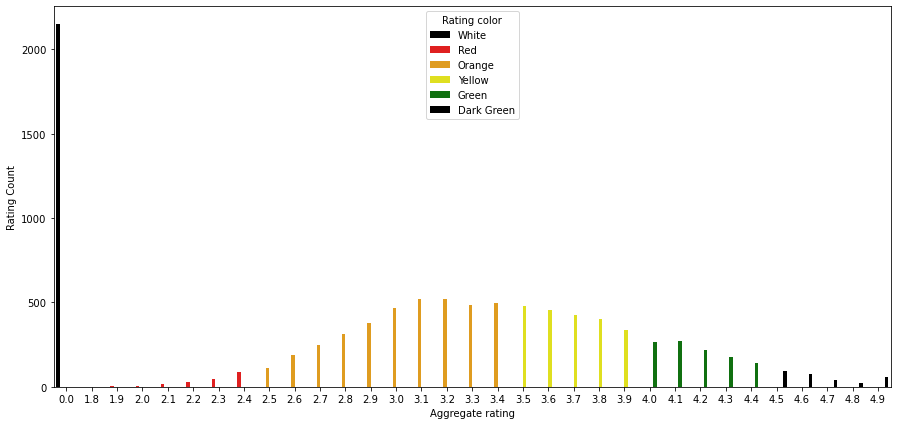

In [38]:
sns.barplot(x='Aggregate rating', y='Rating Count', hue='Rating color', data=aggregate_df, palette=['black','red','orange','yellow','green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

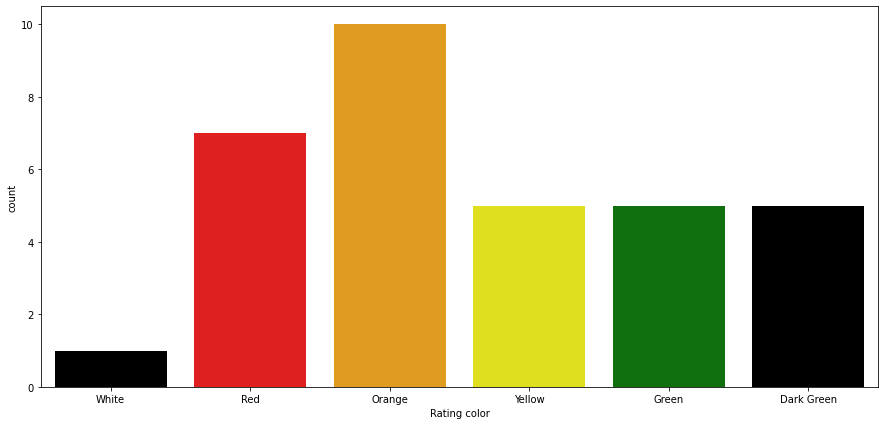

In [39]:
sns.countplot(x='Rating color', data=aggregate_df, palette=['black','red','orange','yellow','green'])

***Observation: maximum rated is 'Orange' which is in range (2.5-3.4)***

# Currency and Country

In [40]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [41]:
final_df[['Currency','Country']].groupby(['Currency','Country']).size().reset_index()

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [42]:
# Which countries has 'ONLINE DELIVERY'
final_df.groupby(['Has Online delivery', 'Country']).size()

Has Online delivery  Country       
No                   Australia           24
                     Brazil              60
                     Canada               4
                     India             6229
                     Indonesia           21
                     New Zealand         40
                     Phillipines         22
                     Qatar               20
                     Singapore           20
                     South Africa        60
                     Sri Lanka           20
                     Turkey              34
                     UAE                 32
                     United Kingdom      80
                     United States      434
Yes                  India             2423
                     UAE                 28
dtype: int64

In [43]:
final_df[final_df['Has Online delivery'] == 'Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [44]:
final_df[final_df['Has Online delivery'] == 'No']['Country'].value_counts()

India             6229
United States      434
United Kingdom      80
Brazil              60
South Africa        60
New Zealand         40
Turkey              34
UAE                 32
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Singapore           20
Qatar               20
Canada               4
Name: Country, dtype: int64

([<matplotlib.patches.Wedge object at 0x000002B6DA98DB80>, <matplotlib.patches.Wedge object at 0x000002B6DA99D2B0>, <matplotlib.patches.Wedge object at 0x000002B6DA99D940>, <matplotlib.patches.Wedge object at 0x000002B6DA99DFD0>], [Text(-0.6207499702746028, 0.9081131396495042, 'New Delhi'), Text(0.07888824382658387, -1.0971675555656746, 'Gurgaon'), Text(0.8905335390443715, -0.6457166683903298, 'Noida'), Text(1.0945551812130687, -0.10931127700117002, 'Faridabad')], [Text(-0.338590892877056, 0.4953344398088204, '69.09%'), Text(0.043029951178136655, -0.5984550303085497, '14.11%'), Text(0.4857455667514753, -0.35220909184927074, '13.63%'), Text(0.597030098843492, -0.05962433290972909, '3.17%')])


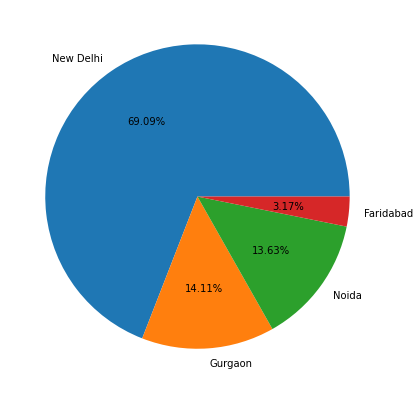

In [45]:
print(plt.pie(x=final_df.City.value_counts().values[:4], labels=final_df.City.value_counts().index[:4], autopct="%1.2f%%"))

In [46]:
final_df.Cuisines

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object